# 1. Environment Setup

## 1.1 Imports

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## 1.2 Plotting Function

In [ ]:
def plot_transform(original_data, transformed_data):
    # Create a figure and a grid of subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    axes[0].hist(original_data, bins=20, color='skyblue', edgecolor='darkblue', alpha=0.7)
    axes[1].hist(transformed_data, bins=20, color='skyblue', edgecolor='darkblue', alpha=0.7)

    axes[0].set_title('Original')
    axes[1].set_title('Transformed')

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

# 2. Transforms

# Scaling | Shifting

## 2.1 Log

*Must be positive, cannot be 1*

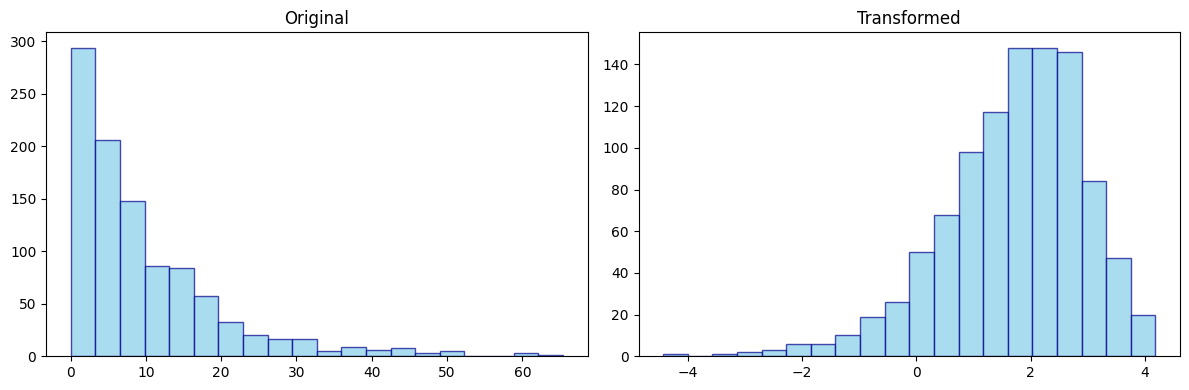

In [32]:
log_original_data = np.random.exponential(scale=10, size=1000)
log_transformed_data = (np.log(log_original_data))

plot_transform(log_original_data, log_transformed_data)

## 2.2 Square Root

*Must be positive*

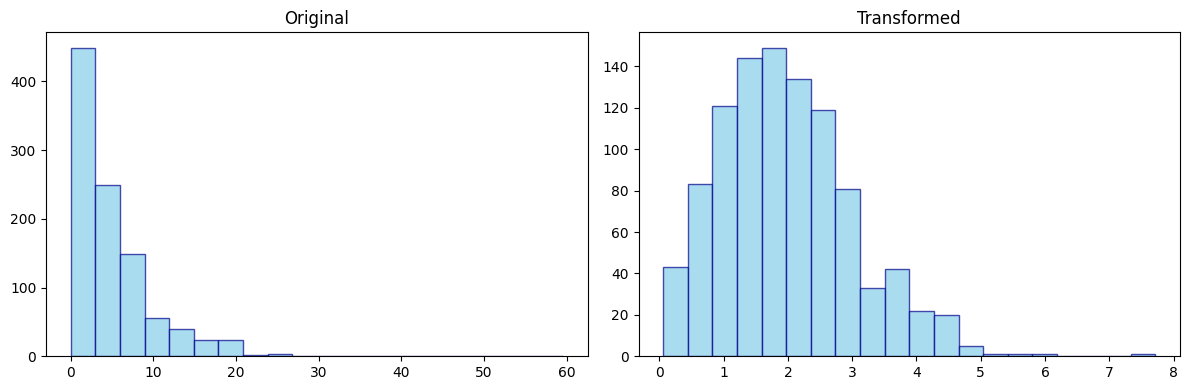

In [33]:
sqrt_original_data = np.random.exponential(scale=5, size=1000)
sqrt_transformed_data = (np.sqrt(sqrt_original_data))

plot_transform(sqrt_original_data, sqrt_transformed_data)

## Box-Cox

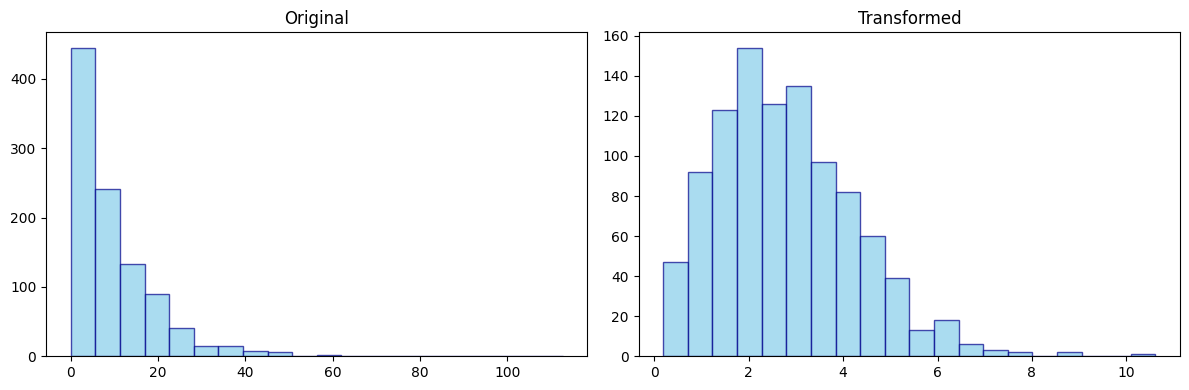

In [35]:
boxcox_original_data = np.random.exponential(scale=10, size=1000) 
boxcox_transformed_data = (np.sqrt(boxcox_original_data))

plot_transform(boxcox_original_data, boxcox_transformed_data)

## Square

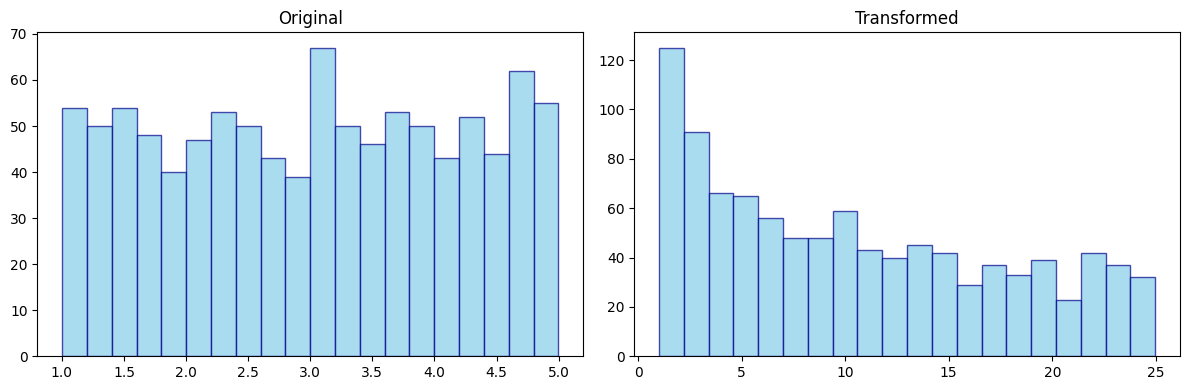

In [55]:
square_original_data = np.random.uniform(low=1, high=5, size=1000)
square_transformed_data = (np.square(square_original_data))

plot_transform(square_original_data, square_transformed_data)

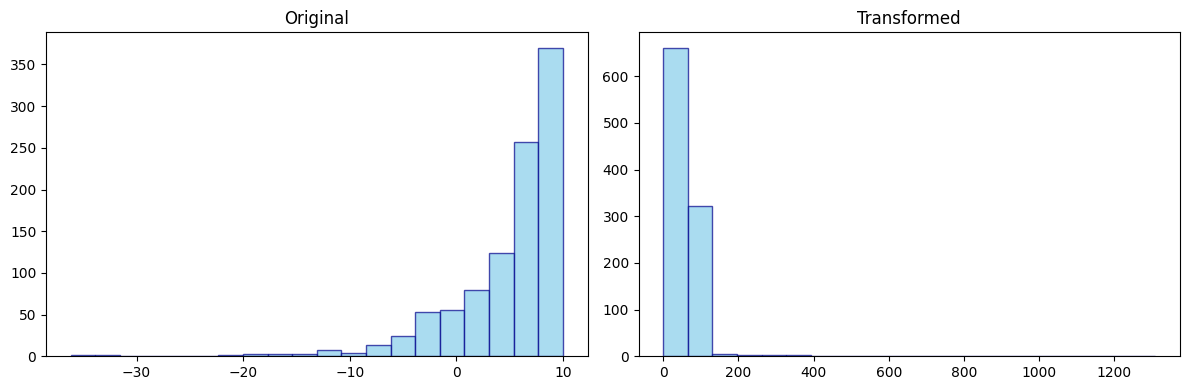

In [54]:
square_original_data =  -np.random.exponential(scale=5, size=1000) + 10
square_transformed_data = np.square(square_original_data)

plot_transform(square_original_data, square_transformed_data)

# 3. Scaling

## Normalizing

In [ ]:
standardized_data = []
standardize = MinMaxScaler()

for data in original_data:
    standardized_data.append(standardize.fit_transform(data))

plot_transform(standardized_data)

ValueError: Expected 2D array, got 1D array instead:
array=[5.08225901 2.74577979 1.65369221 ... 1.25160011 5.13396369 3.04282664].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## Standardizing

In [ ]:
standardized_data = []
standardize = StandardScaler()

for data in original_data:
    standardized_data.append(standardize.fit_transform(data))

plot_transform(standardized_data)

# 4. Outlier Removal

## 4.1 Z-Score

## 4.2 IQR